# Week 4: NLP Disaster Tweets Kaggle Mini-Project

## Background

Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are actually announcing a disaster. In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified


## Objective

The objective of this project is to succesfully implement an NLP model that can predict whether tweets are about real disasters or not. 


# Data 

This dataset was created by the company figure-eight and originally shared on their ‘Data For Everyone’ linked below:

https://www.kaggle.com/c/nlp-getting-started/data

## Import Libraries 

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

plt.rcParams.update({'font.size': 14})

## Load and Clean Data 

In [3]:
# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#sub_sample = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
#clean data 
train.duplicated().sum()

0

In [8]:
#clean data 
test.duplicated().sum()

0

No duplicates is nice to see for once 

In [9]:
# NA data
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [10]:
test.isnull().sum()


id             0
keyword       26
location    1105
text           0
dtype: int64

From our cleaning we see that only a small percentage of tweets have no keyword. 

However, Location has much more null values.

In [11]:
# Check number of unique keywords, and whether they are the same for train and test sets
print (train.keyword.nunique(), test.keyword.nunique())
print (set(train.keyword.unique()) - set(test.keyword.unique()))

221 221
set()


Train and test set have the same amount of key words! 

## Exploratory Data Analysis 

In [27]:
train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

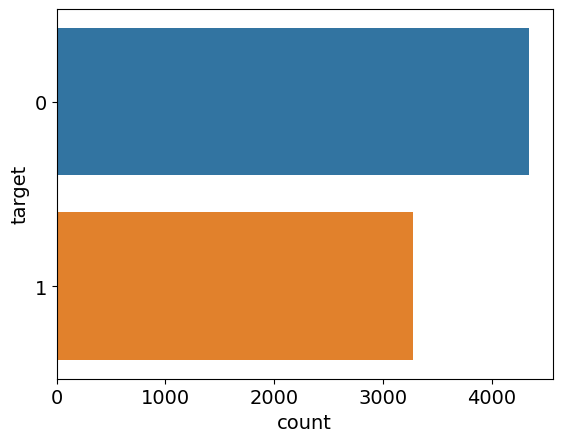

In [7]:
# Class balance
sns.countplot(y=train.target);

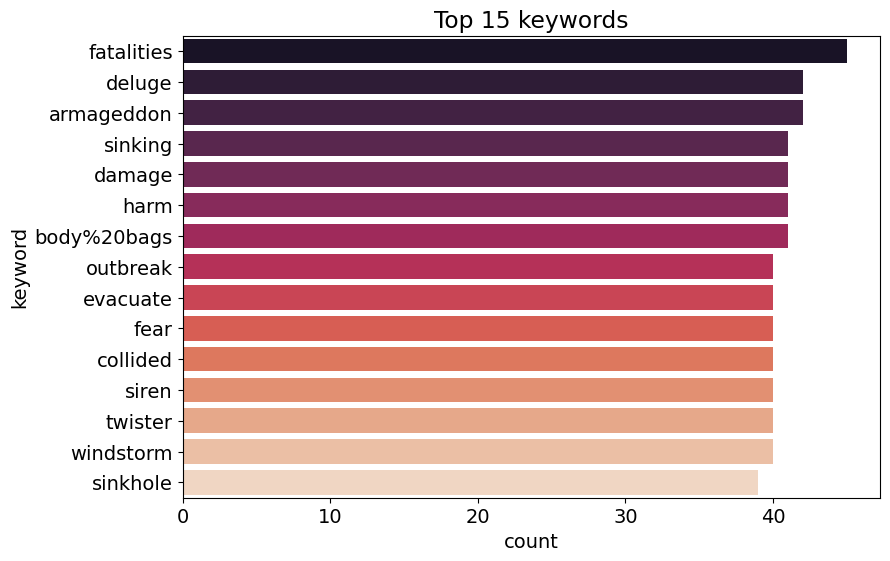

In [25]:
# Most common keywords
plt.figure(figsize=(9,6))
sns.countplot(y=train.keyword, order = train.keyword.value_counts().iloc[:15].index, palette='rocket')
plt.title('Top 15 keywords')
plt.show()
# train.keyword.value_counts().head(10)

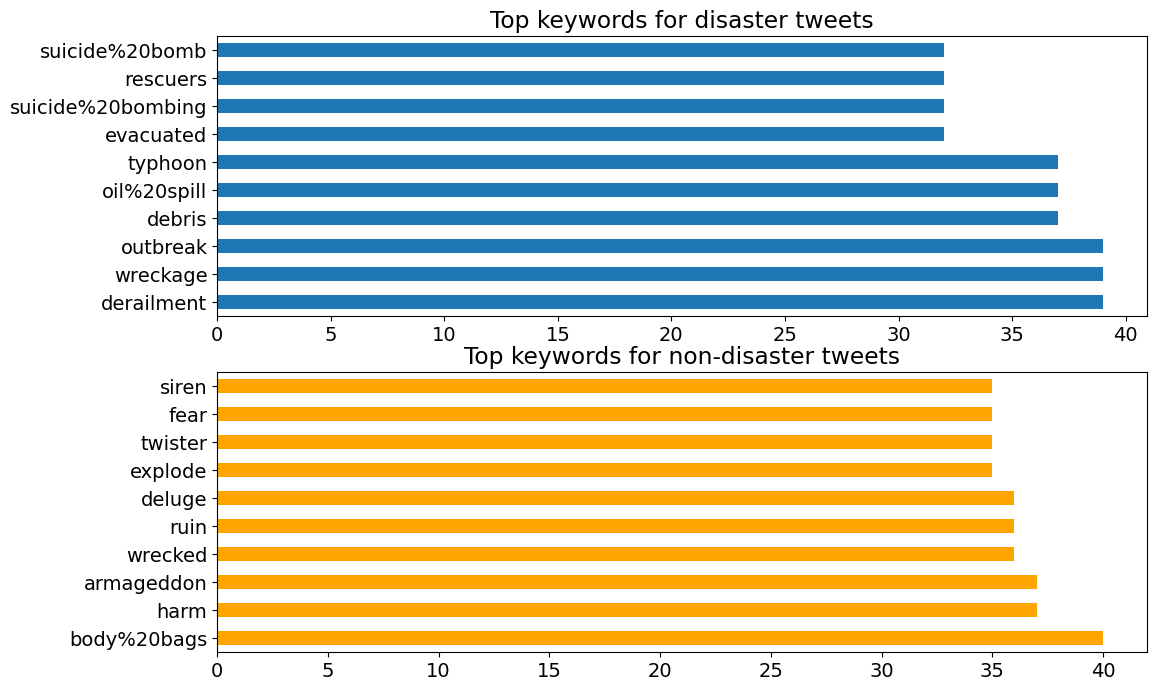

In [81]:
kw_d = train[train.target==1].keyword.value_counts().head(10)
kw_nd = train[train.target==0].keyword.value_counts().head(10)

plt.figure(figsize=(12,8))
plt.subplot(211)
kw_d.plot(kind='barh')
plt.title('Top keywords for disaster tweets')


plt.subplot(212)
kw_nd.plot(kind='barh',color='orange')
plt.title('Top keywords for non-disaster tweets')
plt.show()

/var/folders/ql/wyzwd3sd5xq66k7bq607h2gm0000gn/T/ipykernel_74059/3833088979.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_d = train.groupby('keyword').mean()['target'].sort_values(ascending=False).head(10)
/var/folders/ql/wyzwd3sd5xq66k7bq607h2gm0000gn/T/ipykernel_74059/3833088979.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_nd = train.groupby('keyword').mean()['target'].sort_values().head(10)


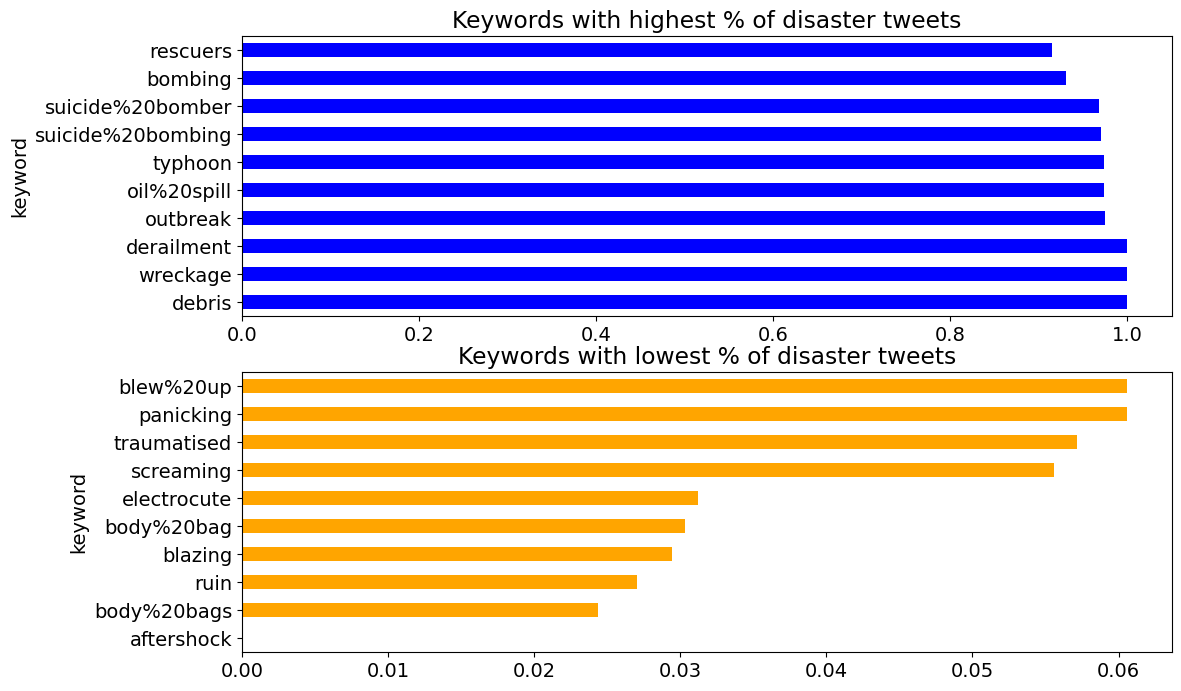

In [82]:
top_d = train.groupby('keyword').mean()['target'].sort_values(ascending=False).head(10)
top_nd = train.groupby('keyword').mean()['target'].sort_values().head(10)

plt.figure(figsize=(12,8))
plt.subplot(211)
top_d.plot(kind='barh', color='blue')
plt.title('Keywords with highest % of disaster tweets')
plt.subplot(212)
top_nd.plot(kind = 'barh', color='orange')
plt.title('Keywords with lowest % of disaster tweets')
plt.show()

In [85]:
# Check number of unique keywords and locations
print (train.location.nunique())

3341


In [84]:
print(test.location.nunique())

1602


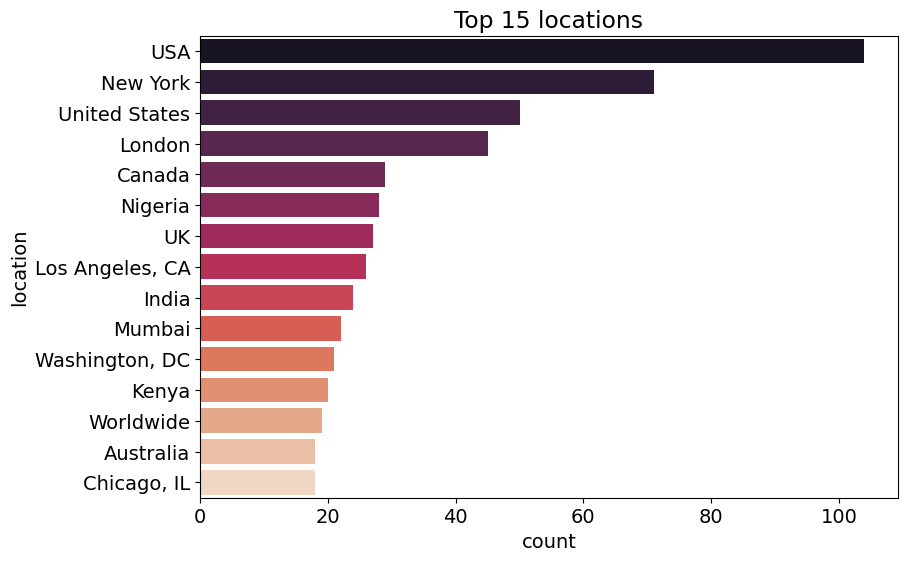

In [87]:
# Most common locations
plt.figure(figsize=(9,6))
sns.countplot(y=train.location, order = train.location.value_counts().iloc[:15].index,palette='rocket')
plt.title('Top 15 locations')
plt.show()

We can see both 'USA' and 'United States' in top locations. We then have a look at % of disaster tweets for common locations.

/var/folders/ql/wyzwd3sd5xq66k7bq607h2gm0000gn/T/ipykernel_74059/2893855641.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_l = top_only.groupby('location').mean()['target'].sort_values(ascending=False)


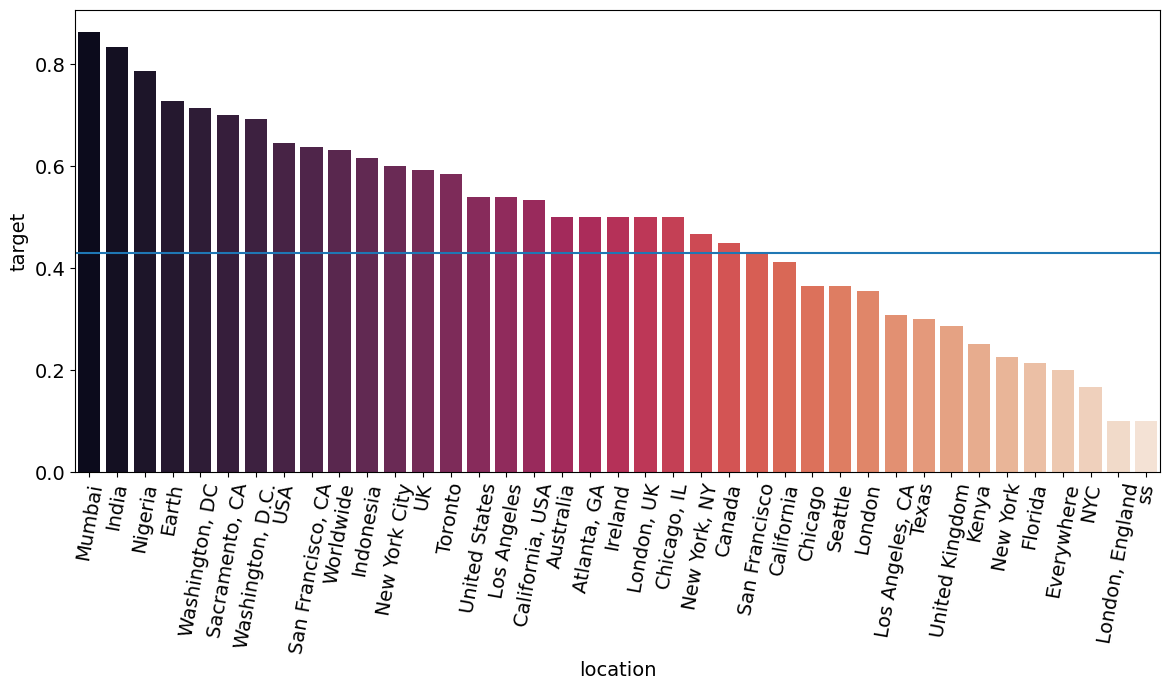

In [89]:
raw_loc = train.location.value_counts()
top_loc = list(raw_loc[raw_loc>=10].index)
top_only = train[train.location.isin(top_loc)]

top_l = top_only.groupby('location').mean()['target'].sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=top_l.index, y=top_l,palette='rocket')
plt.axhline(np.mean(train.target))
plt.xticks(rotation=80)
plt.show()

The top 3 locations with highest % of disaster tweets are Mumbai, Inida, and Nigeria. As the location data is not clean, we see some interesting cases, such as 'London, UK' saw a higher-than-average % of disaster tweets, but 'London' is below average. We try to clean up the location and see if there is any difference:

In [91]:
# Fill NA values
for col in ['keyword','location']:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

In [92]:
def clean_loc(x):
    if x == 'None':
        return 'None'
    elif x == 'Earth' or x =='Worldwide' or x == 'Everywhere':
        return 'World'
    elif 'New York' in x or 'NYC' in x:
        return 'New York'    
    elif 'London' in x:
        return 'London'
    elif 'Mumbai' in x:
        return 'Mumbai'
    elif 'Washington' in x and 'D' in x and 'C' in x:
        return 'Washington DC'
    elif 'San Francisco' in x:
        return 'San Francisco'
    elif 'Los Angeles' in x:
        return 'Los Angeles'
    elif 'Seattle' in x:
        return 'Seattle'
    elif 'Chicago' in x:
        return 'Chicago'
    elif 'Toronto' in x:
        return 'Toronto'
    elif 'Sacramento' in x:
        return 'Sacramento'
    elif 'Atlanta' in x:
        return 'Atlanta'
    elif 'California' in x:
        return 'California'
    elif 'Florida' in x:
        return 'Florida'
    elif 'Texas' in x:
        return 'Texas'
    elif 'United States' in x or 'USA' in x:
        return 'USA'
    elif 'United Kingdom' in x or 'UK' in x or 'Britain' in x:
        return 'UK'
    elif 'Canada' in x:
        return 'Canada'
    elif 'India' in x:
        return 'India'
    elif 'Kenya' in x:
        return 'Kenya'
    elif 'Nigeria' in x:
        return 'Nigeria'
    elif 'Australia' in x:
        return 'Australia'
    elif 'Indonesia' in x:
        return 'Indonesia'
    elif x in top_loc:
        return x
    else: return 'Others'
    
train['location_clean'] = train['location'].apply(lambda x: clean_loc(str(x)))
test['location_clean'] = test['location'].apply(lambda x: clean_loc(str(x)))

/var/folders/ql/wyzwd3sd5xq66k7bq607h2gm0000gn/T/ipykernel_74059/2407296146.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_l2 = train.groupby('location_clean').mean()['target'].sort_values(ascending=False)


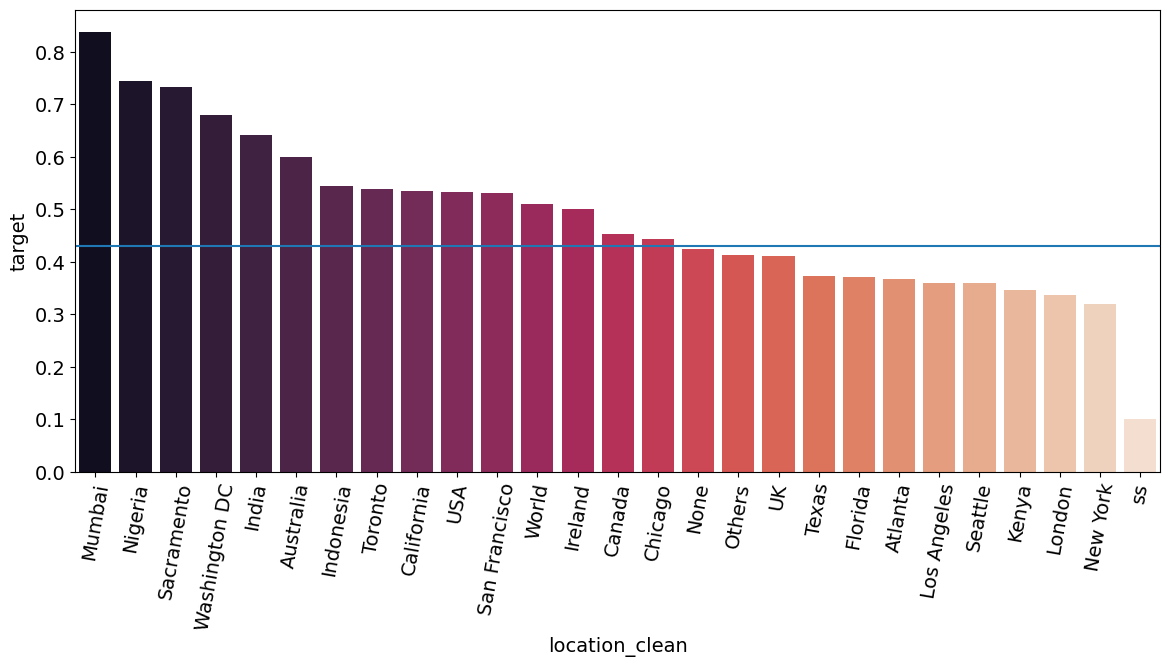

In [93]:
top_l2 = train.groupby('location_clean').mean()['target'].sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=top_l2.index, y=top_l2,palette = 'rocket')
plt.axhline(np.mean(train.target))
plt.xticks(rotation=80)
plt.show()

Mumbai and Nigeria are still on the top. I am unsure what 'ss' is, potentially South Sudan. 

London and New York made the bottom of % of disaster tweets.

## Text cleaning 

In [94]:
import re

test_str = train.loc[417, 'text']

def clean_text(text):
    text = re.sub(r'https?://\S+', '', text) # Remove link
    text = re.sub(r'\n',' ', text) # Remove line breaks
    text = re.sub('\s+', ' ', text).strip() # Remove leading, trailing, and extra spaces
    return text

print("Original text: " + test_str)
print("Cleaned text: " + clean_text(test_str))

Original text: Arson suspect linked to 30 fires caught in Northern California http://t.co/mmGsyAHDzb
Cleaned text: Arson suspect linked to 30 fires caught in Northern California


In [95]:
def find_hashtags(tweet):
    return " ".join([match.group(0)[1:] for match in re.finditer(r"#\w+", tweet)]) or 'no'

def find_mentions(tweet):
    return " ".join([match.group(0)[1:] for match in re.finditer(r"@\w+", tweet)]) or 'no'

def find_links(tweet):
    return " ".join([match.group(0)[:] for match in re.finditer(r"https?://\S+", tweet)]) or 'no'

def process_text(df):
    
    df['text_clean'] = df['text'].apply(lambda x: clean_text(x))
    df['hashtags'] = df['text'].apply(lambda x: find_hashtags(x))
    df['mentions'] = df['text'].apply(lambda x: find_mentions(x))
    df['links'] = df['text'].apply(lambda x: find_links(x))
    # df['hashtags'].fillna(value='no', inplace=True)
    # df['mentions'].fillna(value='no', inplace=True)
    
    return df
    
train = process_text(train)
test = process_text(test)

In [97]:
from wordcloud import STOPWORDS

def create_stat(df):
    # Tweet length
    df['text_len'] = df['text_clean'].apply(len)
    # Word count
    df['word_count'] = df["text_clean"].apply(lambda x: len(str(x).split()))
    # Stopword count
    df['stop_word_count'] = df['text_clean'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
    # Punctuation count
    df['punctuation_count'] = df['text_clean'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
    # Count of hashtags (#)
    df['hashtag_count'] = df['hashtags'].apply(lambda x: len(str(x).split()))
    # Count of mentions (@)
    df['mention_count'] = df['mentions'].apply(lambda x: len(str(x).split()))
    # Count of links
    df['link_count'] = df['links'].apply(lambda x: len(str(x).split()))
    # Count of uppercase letters
    df['caps_count'] = df['text_clean'].apply(lambda x: sum(1 for c in str(x) if c.isupper()))
    # Ratio of uppercase letters
    df['caps_ratio'] = df['caps_count'] / df['text_len']
    return df

train = create_stat(train)
test = create_stat(test)

print(train.shape, test.shape)

(7613, 19) (3263, 18)


In [98]:
train.corr()['target'].drop('target').sort_values()


/var/folders/ql/wyzwd3sd5xq66k7bq607h2gm0000gn/T/ipykernel_74059/1383308577.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()['target'].drop('target').sort_values()


stop_word_count     -0.111250
mention_count       -0.049654
caps_ratio          -0.014970
punctuation_count   -0.012535
word_count           0.017081
link_count           0.020244
caps_count           0.027808
hashtag_count        0.032853
id                   0.060781
text_len             0.096435
Name: target, dtype: float64

We can see that all of the statistics have very low correlation with the target variable

### Visualizing Stopwords

In [99]:
from nltk import FreqDist, word_tokenize

# Make a set of stop words
stopwords = set(STOPWORDS)
# more_stopwords = {'https', 'amp'}
# stopwords = stopwords.union(more_stopwords)

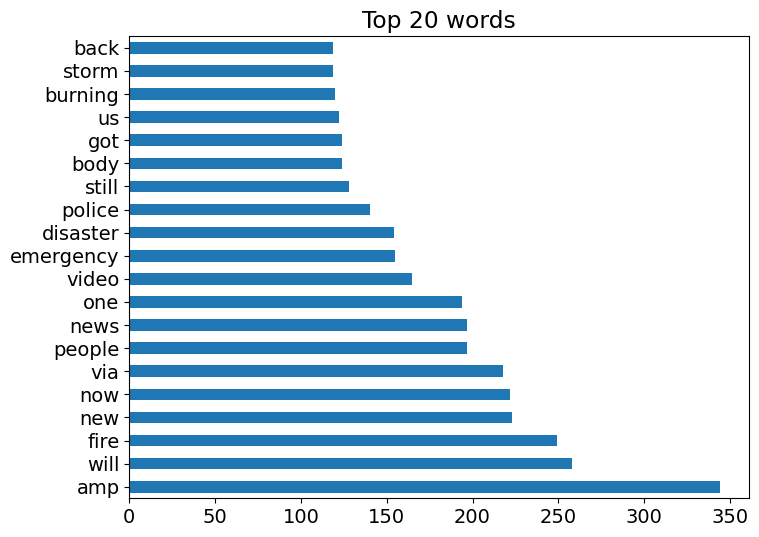

In [101]:
# Unigrams
word_freq = FreqDist(w for w in word_tokenize(' '.join(train['text_clean']).lower()) if 
                     (w not in stopwords) & (w.isalpha()))
df_word_freq = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count'])
top20w = df_word_freq.sort_values('count',ascending=False).head(20)

plt.figure(figsize=(8,6))
top20w['count'].plot(kind = 'barh')
plt.title('Top 20 words')
plt.show()

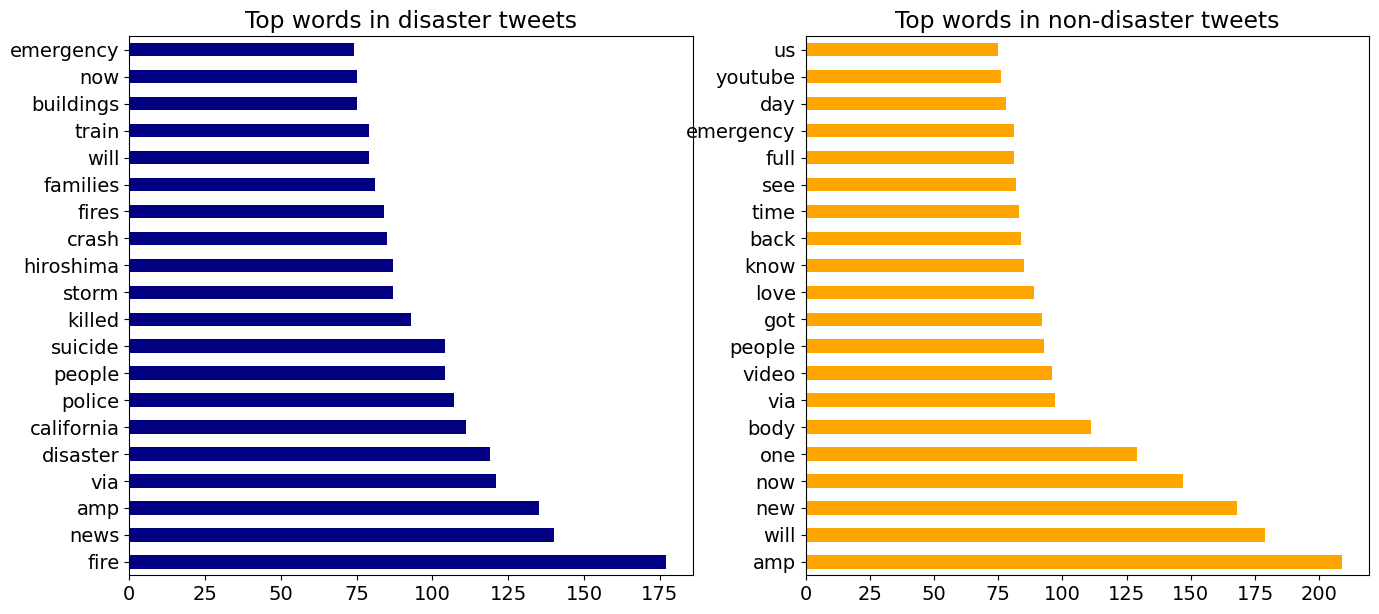

In [106]:
plt.figure(figsize=(16,7))
plt.subplot(121)
freq_d = FreqDist(w for w in word_tokenize(' '.join(train.loc[train.target==1, 'text_clean']).lower()) if 
                     (w not in stopwords) & (w.isalpha()))
df_d = pd.DataFrame.from_dict(freq_d, orient='index', columns=['count'])
top20_d = df_d.sort_values('count',ascending=False).head(20)
top20_d['count'].plot(kind = 'barh',color = 'navy')
plt.title('Top words in disaster tweets')
plt.subplot(122)
freq_nd = FreqDist(w for w in word_tokenize(' '.join(train.loc[train.target==0, 'text_clean']).lower()) if 
                     (w not in stopwords) & (w.isalpha()))
df_nd = pd.DataFrame.from_dict(freq_nd, orient='index', columns=['count'])
top20_nd = df_nd.sort_values('count',ascending=False).head(20)
top20_nd['count'].plot(kind = 'barh',color='orange')
plt.title('Top words in non-disaster tweets')
plt.show()

* Top two words in disaster tweets are 'emergency' and 'now'. Both these words make the top words in non disaster tweets. this might make things very difficult. 
* Words are more specific for real disaster tweets (e.g. 'califonia', 'hiroshima', 'fire', 'police', 'suicide').

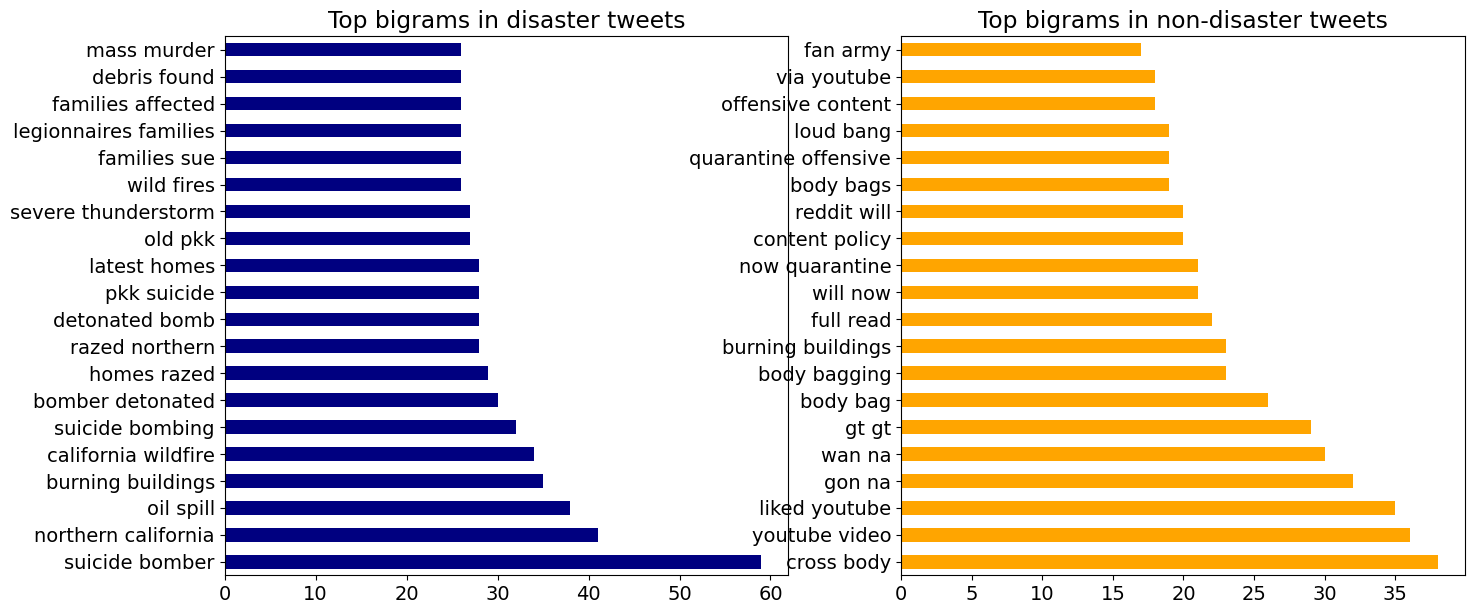

In [141]:
# Bigrams

from nltk import bigrams

plt.figure(figsize=(16,7))
plt.subplot(121)
bigram_d = list(bigrams([w for w in word_tokenize(' '.join(train.loc[train.target==1, 'text_clean']).lower()) if 
              (w not in stopwords) & (w.isalpha())]))
d_fq = FreqDist(bg for bg in bigram_d)
bgdf_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
bgdf_d.index = bgdf_d.index.map(lambda x: ' '.join(x))
bgdf_d = bgdf_d.sort_values('count',ascending=False)
bgdf_d.head(20)['count'].plot(kind = 'barh',color='navy')
plt.title('Top bigrams in disaster tweets')
plt.subplot(122)
bigram_nd = list(bigrams([w for w in word_tokenize(' '.join(train.loc[train.target==0, 'text_clean']).lower()) if 
              (w not in stopwords) & (w.isalpha())]))
nd_fq = FreqDist(bg for bg in bigram_nd)
bgdf_nd = pd.DataFrame.from_dict(nd_fq, orient='index', columns=['count'])
bgdf_nd.index = bgdf_nd.index.map(lambda x: ' '.join(x))
bgdf_nd = bgdf_nd.sort_values('count',ascending=False)
bgdf_nd.head(20)['count'].plot(kind = 'barh',color='orange')
plt.title('Top bigrams in non-disaster tweets')
plt.show()

* Most top bigrams in disaster tweets show certain kinds of catestrophe (e.g. suicide bomber, oil spill, northern california);

* for non-disaster tweets, only 'burning buildings' as top bigram look like a disaster;

* 'youtube' appears in three of the twenty bigrams for non-disaster tweets; none in disaster tweets

## Encoding and Vectorizers

* Apply target encoding to keyword and location (cleaned)
* Count Vectorize cleaned text, links, hashtags and mentions columns

In [109]:
import category_encoders as ce

# Target encoding
features = ['keyword', 'location_clean']
encoder = ce.TargetEncoder(cols=features)
encoder.fit(train[features],train['target'])

train = train.join(encoder.transform(train[features]).add_suffix('_target'))
test = test.join(encoder.transform(test[features]).add_suffix('_target'))

In [111]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer

# Links
vec_links = CountVectorizer(min_df = 5, analyzer = 'word', token_pattern = r'https?://\S+') # Only include those >=5 occurrences
link_vec = vec_links.fit_transform(train['links'])
link_vec_test = vec_links.transform(test['links'])
X_train_link = pd.DataFrame(link_vec.toarray(), columns=vec_links.get_feature_names_out())
X_test_link = pd.DataFrame(link_vec_test.toarray(), columns=vec_links.get_feature_names_out())

In [112]:
# Mentions
vec_men = CountVectorizer(min_df = 5)
men_vec = vec_men.fit_transform(train['mentions'])
men_vec_test = vec_men.transform(test['mentions'])
X_train_men = pd.DataFrame(men_vec.toarray(), columns=vec_men.get_feature_names_out())
X_test_men = pd.DataFrame(men_vec_test.toarray(), columns=vec_men.get_feature_names_out())

In [113]:
# Hashtags
vec_hash = CountVectorizer(min_df = 5)
hash_vec = vec_hash.fit_transform(train['hashtags'])
hash_vec_test = vec_hash.transform(test['hashtags'])
X_train_hash = pd.DataFrame(hash_vec.toarray(), columns=vec_hash.get_feature_names_out())
X_test_hash = pd.DataFrame(hash_vec_test.toarray(), columns=vec_hash.get_feature_names_out())
print (X_train_link.shape, X_train_men.shape, X_train_hash.shape)

(7613, 6) (7613, 18) (7613, 107)


In [114]:
hash_rank = (X_train_hash.transpose().dot(train['target']) / X_train_hash.sum(axis=0)).sort_values(ascending=False)
print('Hashtags with which 100% of Tweets are disasters: ')
print(list(hash_rank[hash_rank==1].index))
print('Total: ' + str(len(hash_rank[hash_rank==1])))
print('Hashtags with which 0% of Tweets are disasters: ')
print(list(hash_rank[hash_rank==0].index))
print('Total: ' + str(len(hash_rank[hash_rank==0])))

Hashtags with which 100% of Tweets are disasters: 
['abstorm', 'earthquake', 'hiroshima', 'india', 'japan', 'libya', 'africa', 'mumbai', 'myanmar', 'newyork', 'okwx', 'rohingya', 'science', 'sittwe', 'socialnews', 'wildfire', 'wildfires', 'worldnews', 'wx', 'hailstorm', 'mh370', 'yyc', 'disaster', 'breaking', 'bestnaijamade', 'antioch']
Total: 26
Hashtags with which 0% of Tweets are disasters: 
['dubstep', 'edm', 'animalrescue', 'fashion', 'technology', 'dance', 'trapmusic', 'ices', 'np', 'job', 'jobs', 'summerfate', 'kindle', 'soundcloud', 'military', 'bb17', 'beyhive', 'dnb']
Total: 18


In [116]:
# Tf-idf for text
from sklearn.feature_extraction.text import TfidfVectorizer

vec_text = TfidfVectorizer(min_df = 10, ngram_range = (1,2), stop_words='english') 
# Only include >=10 occurrences
# Have unigrams and bigrams
text_vec = vec_text.fit_transform(train['text_clean'])
text_vec_test = vec_text.transform(test['text_clean'])
X_train_text = pd.DataFrame(text_vec.toarray(), columns=vec_text.get_feature_names_out())
X_test_text = pd.DataFrame(text_vec_test.toarray(), columns=vec_text.get_feature_names_out())
print (X_train_text.shape)

(7613, 1691)


In [117]:
# Joining the dataframes together

train = train.join(X_train_link, rsuffix='_link')
train = train.join(X_train_men, rsuffix='_mention')
train = train.join(X_train_hash, rsuffix='_hashtag')
train = train.join(X_train_text, rsuffix='_text')
test = test.join(X_test_link, rsuffix='_link')
test = test.join(X_test_men, rsuffix='_mention')
test = test.join(X_test_hash, rsuffix='_hashtag')
test = test.join(X_test_text, rsuffix='_text')
print (train.shape, test.shape)

(7613, 1843) (3263, 1842)


## Model: Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

features_to_drop = ['id', 'keyword','location','text','location_clean','text_clean', 'hashtags', 'mentions','links']
scaler = MinMaxScaler()

X_train = train.drop(columns = features_to_drop + ['target'])
X_test = test.drop(columns = features_to_drop)
y_train = train.target

lr = LogisticRegression(solver='liblinear', random_state=777) # Other solvers have failure to converge problem


In [119]:
pipeline = Pipeline([('scale',scaler), ('lr', lr),])

pipeline.fit(X_train, y_train)
y_test = pipeline.predict(X_test)

In [121]:
print ('Training accuracy: %.4f' % pipeline.score(X_train, y_train))

Training accuracy: 0.8543


In [122]:
# F-1 score
from sklearn.metrics import f1_score

print ('Training f-1 score: %.4f' % f1_score(y_train, pipeline.predict(X_train)))

Training f-1 score: 0.8201


In [123]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_train, pipeline.predict(X_train)))

,0,1
0,3977,365
1,744,2527


# Improve Logistic Regression Model  

* Cross validation with shuffle split
* Feature selections
* Grid search for hyperparameters
* Identify errors

In [124]:
# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=123)
cv_score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')
print('Cross validation F-1 score: %.3f' %np.mean(cv_score))

Cross validation F-1 score: 0.755


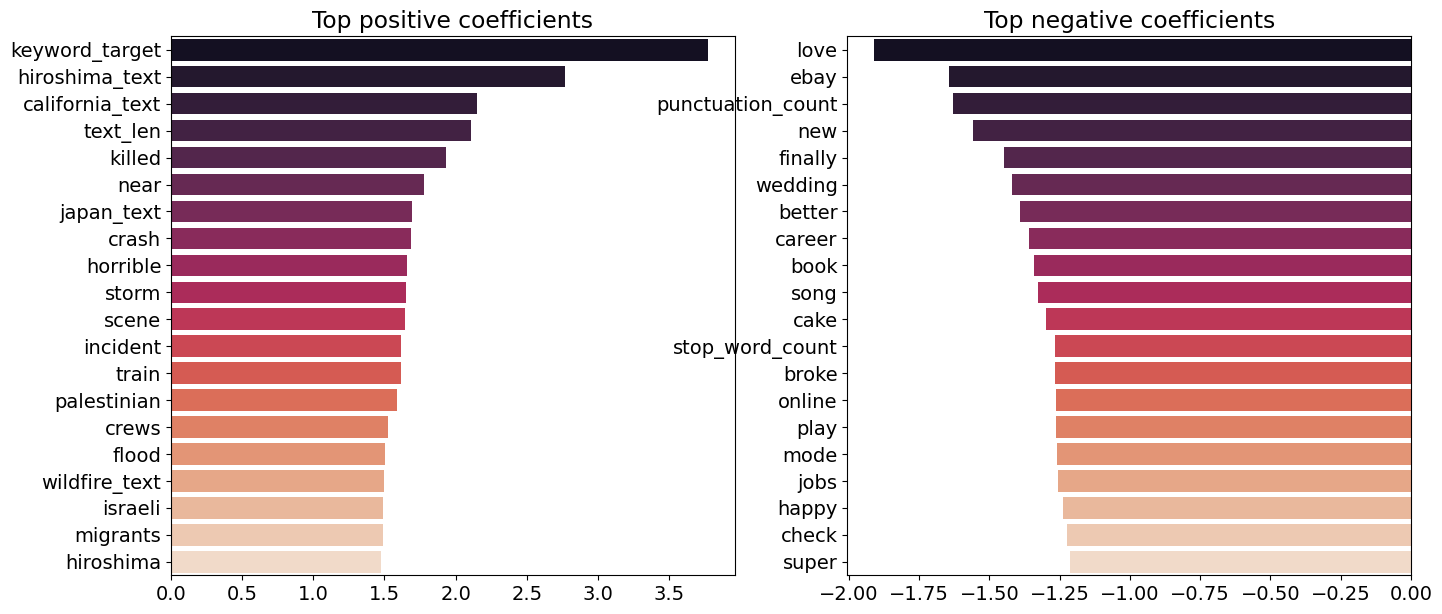

In [126]:
# Top Features


plt.figure(figsize=(16,7))
s1 = pd.Series(np.transpose(lr.coef_[0]), index=X_train.columns).sort_values(ascending=False)[:20]
s2 = pd.Series(np.transpose(lr.coef_[0]), index=X_train.columns).sort_values()[:20]
plt.subplot(121)
sns.barplot(y=s1.index, x=s1,palette = 'rocket')
plt.title('Top positive coefficients')
plt.subplot(122)
sns.barplot(y=s2.index, x=s2,palette = 'rocket')
plt.title('Top negative coefficients')
plt.show()

* 'keyword_target' is the top positive coefficient, meaning the keyword column made a good feature

* hiroshima both as text and hashtag made the top 20 positive coefficients
* Punctuation count and stop word count are among top 20 negative coefficients

We then pick up the 1133 selected features to do Grid Search CV to find optimal hyperparameters

In [129]:
selected_features = X_train.columns[rfecv.ranking_ == 1]
X_train2 = X_train[selected_features]
X_test2 = X_test[selected_features]

In [130]:
# lr2 = LogisticRegression(solver='liblinear', random_state=37)
pipeline.fit(X_train2, y_train)
cv2 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=456)
cv_score2 = cross_val_score(pipeline, X_train2, y_train, cv=cv2, scoring='f1')
print('Cross validation F-1 score: %.3f' %np.mean(cv_score2))

Cross validation F-1 score: 0.779


In [131]:
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-2,2,5), "penalty":["l1","l2"]}
lr_cv = GridSearchCV(LogisticRegression(solver='liblinear', random_state=20), grid, cv=cv2, scoring = 'f1')

pipeline_grid = Pipeline([('scale',scaler), ('gridsearch', lr_cv),])

pipeline_grid.fit(X_train2, y_train)

print("Best parameter: ", lr_cv.best_params_)
print("F-1 score: %.3f" %lr_cv.best_score_)

Best parameter:  {'C': 1.0, 'penalty': 'l2'}
F-1 score: 0.778


In [139]:
# Submit fine-tuned model

sub_sample = pd.read_csv("nlp-getting-started/sample_submission.csv")

y_test = pipeline_grid.predict(X_test2)
submit = sub_sample.copy()
submit.target = y_test
submit.to_csv('submit_lr2.csv',index=False)

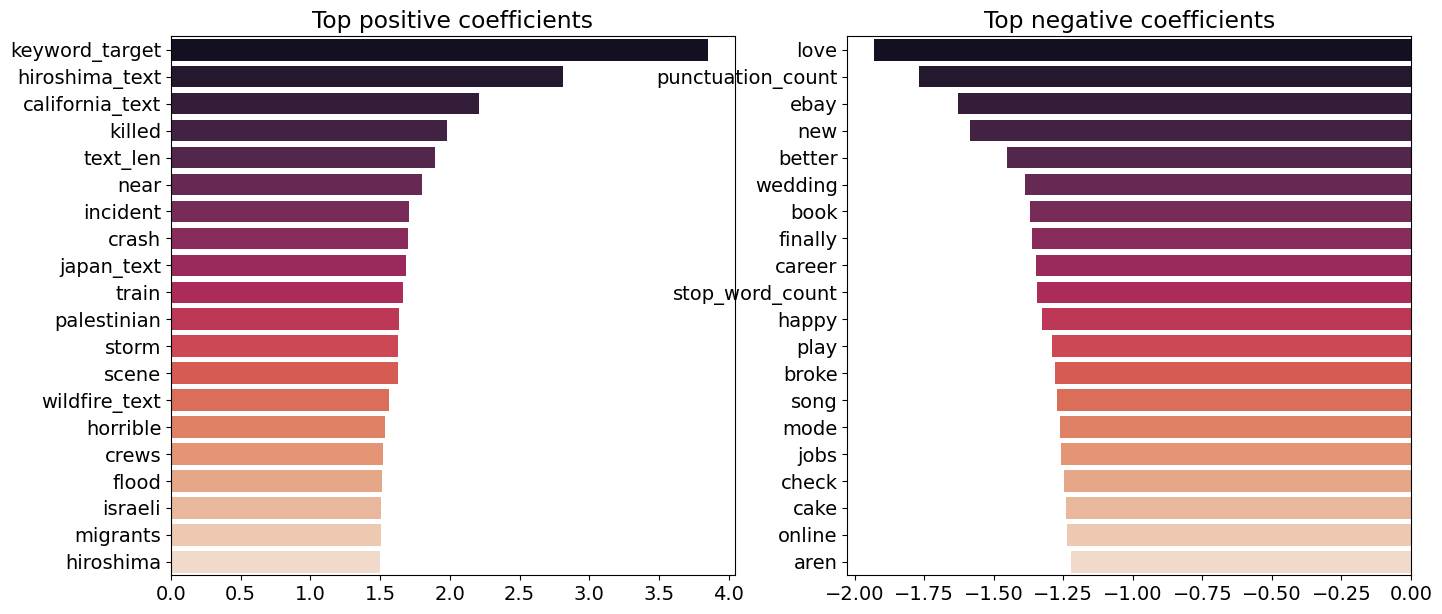

In [136]:
# Top features with fine-tuned model
plt.figure(figsize=(16,7))
s1 = pd.Series(np.transpose(lr.coef_[0]), index=X_train2.columns).sort_values(ascending=False)[:20]
s2 = pd.Series(np.transpose(lr.coef_[0]), index=X_train2.columns).sort_values()[:20]
plt.subplot(121)
sns.barplot(y=s1.index, x=s1,palette = 'rocket')
plt.title('Top positive coefficients')
plt.subplot(122)
sns.barplot(y=s2.index, x=s2,palette = 'rocket')
plt.title('Top negative coefficients')
plt.show()

With our improved model we see similar top positive coefficients and negative coefficients 

In [137]:
# Error analysis
y_hat = pipeline_grid.predict_proba(X_train2)[:,1]
checker = train.loc[:,['text','keyword','location','target']]
checker['pred_prob'] = y_hat
checker['error'] = np.abs(checker['target'] - checker['pred_prob'])

# Top 50 mispredicted tweets
error50 = checker.sort_values('error', ascending=False).head(50)
error50 = error50.rename_axis('id').reset_index()
error50.target.value_counts()

1    46
0     4
Name: target, dtype: int64

Among the top 50 mispredicted tweets, only 4 are false positive!

In [138]:
pd.options.display.max_colwidth = 200

error50.loc[0:10,['text','target','pred_prob']]

,text,target,pred_prob
0,all that panicking made me tired ;__; i want to sleep in my bed,1,0.037656
1,@OllyMursAus I do feel sorry for him! He is not a piece of meat! He is a nice guy... People don't need to rush him and screams in his face!,1,0.043423
2,The Opposite of Love is Fear HereÛªs Why\nhttp://t.co/r5bXZzhXkm,1,0.045793
3,@BenKin97 @Mili_5499 remember when u were up like 4-0 and blew it in one game? U probs don't because it was before the kings won the cup,1,0.046038
4,Do you feel like you are sinking in low self-image? Take the quiz: http://t.co/bJoJVM0pjX http://t.co/wHOc7LHb5F,1,0.048353
5,Hellfire! We donÛªt even want to think about it or mention it so letÛªs not do anything that leads to it #islam!,1,0.052917
6,Just came back from camping and returned with a new song which gets recorded tomorrow. Can't wait! #Desolation #TheConspiracyTheory #NewEP,1,0.054878
7,I liked a @YouTube video from @itsjustinstuart http://t.co/oDV3RqS8JU GUN RANGE MAYHEM!,1,0.056286
8,How long O Lord (Study 3)\n The sixth seal opens the events of Revelation 12. The political upheaval in the Roman... http://t.co/GW0CXoOJyV,1,0.057017
9,Crazy Mom Threw Teen Daughter a NUDE Twister Sex Party According To Her Friend50 =&gt;http://t.co/Hy5Pbe12TM http://t.co/c1nJpLi5oR,1,0.060184


# Conclusion

Our objective was to create a successful NLP model that can label tweets about disasters. I would confidently say I was able to create a very basic model that did just that. 


We did make some model adjustments such as Cross validation with shuffle split, Feature selections, Grid search for hyperparameters and worked with Identify errors and in the end our improved model gave us a submission score of ~80 percent. 

I would like to approach this project again but with a more advanced algorithm such as SVM, XGBoost and RNN or CNN. 